#***Error Handling, Logging, and Data Manipulation***

###**1. What is the difference between multithreading and multiprocessing?**

The difference between multithreading and multiprocessing is mainly how they handle parallel execution and system resources:

###**Definition -**

**(l) Multithreading -**  Runs multiple threads within a single process.

**(ll) Multiprocessing -** Runs multiple processes, each with its own memory space.
###***Memory Usage -***

**(l) Multithreading -** Threads share the same memory.

**(ll) Multiprocessing -** Each process has its own separate memory.
###***Communication -***

**(l) Multithreading -** Easier (shared memory).

**(ll) Multiprocessing -** More complex (requires inter-process communication).
###***Best For -***

**(l) Multithreading -** I/O-bound tasks (e.g., reading files, web requests).

**(ll) Multiprocessing -** CPU-bound tasks (e.g., calculations, data processing).
###***Crash Impact -***

**(l) Multithreading -** One thread crash can affect the whole process.

**(ll)  Multiprocessing -** One process crash doesn’t affect others.
###***Parallel Execution in Python -***

**(l) Multithreading -** Limited by the Global Interpreter Lock (GIL).

**(ll) Multiprocessing -** Achieves true parallelism since each process has its own interpreter.
###***Modules Used -***

**(l) Multithreading -** `threading`

**(ll) Multiprocessing -** `multiprocessing`

###**2. What are the challenges associated with memory management in Python?**

Memory management in Python -

###***(I) Garbage Collection Overhead***

* Python automatically manages memory using reference counting and a garbage collector.


* However, garbage collection can introduce performance overhead, especially in large programs with many objects.

###***(II) Circular References***

* When two or more objects reference each other, their reference count never drops to zero.


* The garbage collector must detect and clean these cycles, which adds complexity and sometimes fails if objects define custom `__del__()` methods.
###***(III) Memory Leaks***

* Even though Python manages memory automatically, memory leaks can still occur — for example, when:

  (a) Objects are unintentionally kept in global variables or caches.

  (b) References are held by closures or data structures (like lists or dictionaries) that aren’t cleared.
###***(IV) Fragmentation***

* Python’s memory allocator (especially in CPython) can lead to memory fragmentation, where free memory is spread in small pieces, reducing efficiency.
###***(V) Large Object Retention***

* Large data structures (like big lists, dictionaries, or NumPy arrays) can stay in memory longer than expected, especially if references are not properly released.
###***(VI) GIL Limitation***

* The Global Interpreter Lock (GIL) restricts Python threads from executing simultaneously, which can affect performance and memory efficiency in multi-threaded applications.
###***(VII) External Libraries***

* Extensions written in C or C++ (like NumPy or custom modules) may manage memory outside of Python’s control, potentially causing leaks or crashes if not handled carefully.

###**3. Write a Python program that logs an error message to a log file when a division by zero exception occurs.**




In [1]:
import logging

# Configure logging
logging.basicConfig(filename='error.log', level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def divide(a, b):
    try:
        result = a / b
        print(f"Result: {result}")
    except ZeroDivisionError as e:
        logging.error("Division by zero error occurred: %s", e)
        print("Error: Cannot divide by zero!")

# Example usage
divide(10, 0)

ERROR:root:Division by zero error occurred: division by zero


Error: Cannot divide by zero!


###**4. Write a Python program that reads from one file and writes its content to another file .**

In [2]:
# Program to copy a file line by line

source_file = "input.txt"
destination_file = "output.txt"

try:
    with open(source_file, 'r') as src, open(destination_file, 'w') as dest:
        for line in src:
            dest.write(line)
    print("File copied successfully!")
except FileNotFoundError:
    print("Error: The source file does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The source file does not exist.


###**5. Write a program that handles both `IndexError` and `KeyError` using a try-except block .**:

In [3]:
# Program to handle IndexError and KeyError

numbers = [1, 2, 3]
person = {"name": "John", "age": 30}

try:
    # Attempt to access elements that might cause errors
    for i in range(5):  # This will go beyond the list length
        print(f"Number at index {i}: {numbers[i]}")

    # Access a non-existent key in dictionary
    print(f"City: {person['city']}")

except IndexError:
    print("Error: Tried to access an invalid list index.")
except KeyError:
    print("Error: Tried to access a key that doesn't exist in the dictionary.")

Number at index 0: 1
Number at index 1: 2
Number at index 2: 3
Error: Tried to access an invalid list index.


###**6. What are the differences between `NumPy arrays` and `Python lists`?**

| **Feature**               | **NumPy Array**                                                                                    | **Python List**                                                         |
| ------------------------- | -------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Data Type**             | Can store **only one data type** (e.g., all integers or all floats).                               | Can store **mixed data types** (e.g., int, float, string).              |
| **Memory Efficiency**     | More **memory-efficient** — stores data in a compact way.                                          | Less efficient — stores references to objects, which takes more memory. |
| **Performance**           | Much **faster** for numerical operations (implemented in C).                                       | **Slower** for numerical computations.                                  |
| **Vectorized Operations** | Supports **vectorized operations** — you can perform math directly on arrays without loops.        | Does **not** support vectorized math; must loop manually.               |
| **Dimensionality**        | Can handle **multi-dimensional arrays** (e.g., matrices, tensors).                                 | Usually **one-dimensional**; nested lists needed for higher dimensions. |
| **Functions & Features**  | Provides many **built-in mathematical functions** (e.g., `sum()`, `mean()`, `dot()`, `reshape()`). | Fewer built-in functions for numerical computation.                     |
| **Memory Storage**        | Stores data in **contiguous memory** blocks.                                                       | Stores **references** to objects scattered in memory.                   |
| **Library Requirement**   | Requires the **NumPy** library (`import numpy as np`).                                             | Built-in data structure in Python (no imports needed).                  |


In [5]:
import numpy as np

# NumPy array
arr = np.array([1, 2, 3])
print(arr + 5)   # [6 7 8]  (Vectorized operation)

# Python list
lst = [1, 2, 3]
print([x + 5 for x in lst])  # [6, 7, 8]  (Loop required)

[6 7 8]
[6, 7, 8]


###**7. Explain the difference between `apply()` and `map()` in Pandas.**

| **Aspect**         | **`map()`**                                                               | **`apply()`**                                                                           |
| ------------------ | ------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **Used With**      | Works only on **Series** (one column).                                    | Works on both **Series and DataFrames**.                                                |
| **Function Scope** | Applies a function **element-wise** to each value in a Series.            | Can apply a function to **rows or columns** of a DataFrame or element-wise to a Series. |
| **Input Type**     | Accepts a **function**, **dictionary**, or **Series** for mapping values. | Accepts any **function** that operates on a row, column, or entire DataFrame.           |
| **Return Type**    | Returns a new **Series**.                                                 | Returns either a **Series** or **DataFrame**, depending on context.                     |
| **Common Use**     | Transform or map individual values in a column.                           | Perform custom operations involving multiple columns or aggregations.                   |


**Example For `map()` -**

In [6]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])
print(s.map(lambda x: x**2))

0     1
1     4
2     9
3    16
dtype: int64


**Example For `apply()` -**

In [7]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# Apply function to each column
print(df.apply(lambda x: x * 2))

   A   B
0  2  20
1  4  40
2  6  60


###**8. Create a histogram using Seaborn to visualize a distribution.**

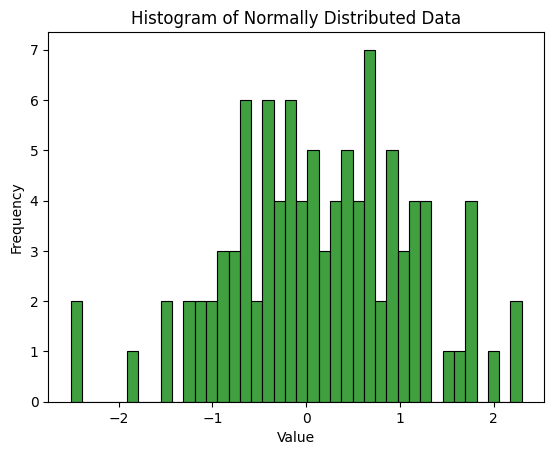

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = np.random.randn(100)
# Create histogram
sns.histplot(data, bins=40, kde=False, color='green')

# Add title and labels
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()


###**9. Use Pandas to load a CSV file and display its first 5 rows.**

In [11]:
import pandas as pd

# Create a sample data.csv file for demonstration
import pandas as pd

Subjects_Marks = {'Varun Marks': [85, 90, 70, 65, 75],
               'Komal Marks': [95, 92, 93, 88, 86]}
sample_df = pd.DataFrame(Subjects_Marks)
sample_df.to_csv('data.csv', index=False)

print("Sample 'data.csv' created successfully.")

# Load the CSV file with some options
df = pd.read_csv(
    "data.csv",
    sep=",",
    na_values=["french", "Maths", "English", "Science", "Statistics"]
)

# Display the first 5 rows
print(df.head(5))


print(df.info())

Sample 'data.csv' created successfully.
   Varun Marks  Komal Marks
0           85           95
1           90           92
2           70           93
3           65           88
4           75           86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Varun Marks  5 non-null      int64
 1   Komal Marks  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None


###**10. Calculate the correlation matrix using Seaborn and visualize it with a heatmap.**

          A         B         C         D
A  1.000000 -0.982715  0.983954  0.137871
B -0.982715  1.000000 -0.993754 -0.072727
C  0.983954 -0.993754  1.000000  0.068268
D  0.137871 -0.072727  0.068268  1.000000


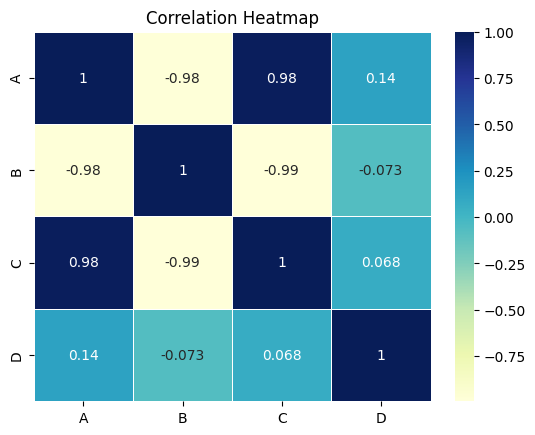

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "A": [20, 30, 35, 55, 65],
    "B": [55, 46, 38, 29, 15],
    "C": [28, 34, 46, 57, 69],
    "D": [55, 35, 19, 38, 53]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()